In [25]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist
import random

In [11]:
a = tf.constant(2, dtype = tf.int32)
b = tf.constant(3, dtype = tf.int32)

tf.print(a+b)

5


step: 0, loss: 0.172935, W: 0.298315, b: 0.423580
step: 100, loss: 0.164528, W: 0.293045, b: 0.505221
step: 200, loss: 0.160420, W: 0.284110, b: 0.568569
step: 300, loss: 0.157893, W: 0.277103, b: 0.618248
step: 400, loss: 0.156340, W: 0.271607, b: 0.657207
step: 500, loss: 0.155384, W: 0.267298, b: 0.687759
step: 600, loss: 0.154796, W: 0.263918, b: 0.711720
step: 700, loss: 0.154435, W: 0.261268, b: 0.730510
step: 800, loss: 0.154213, W: 0.259189, b: 0.745245
step: 900, loss: 0.154076, W: 0.257559, b: 0.756802


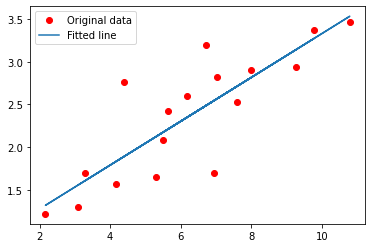

In [13]:
# Linear Regression

# Training Data
train_X = [3.3, 4.4, 5.5, 6.71, 6.93, 4.168, 9.779, 6.182, 7.59, 2.167,
           7.042, 10.791, 5.313, 7.997, 5.654, 9.27, 3.1]
train_Y = [1.7, 2.76, 2.09, 3.19, 1.694, 1.573, 3.366, 2.596, 2.53, 1.221,
           2.827, 3.465, 1.65, 2.904, 2.42, 2.94, 1.3]
n_samples = len(train_X)

# Parameters
learning_rate = 0.01
display_step = 100
num_steps = 1000

# Weight and Bias
W = tf.Variable(np.random.randn())
b = tf.Variable(np.random.randn())


# Linear regression (Wx + b)
def linear_regression(inputs):
    return inputs * W + b


# Mean square error
def mean_square(pred, label):
    return tf.reduce_mean(tf.square(pred - label))

def run_optimization_linearReg():
    with tf.GradientTape() as g:
        pred = linear_regression(train_X)
        loss = mean_square(pred, train_Y)
        
    gradients = g.gradient(loss, [W, b])
    
    optimizer.apply_gradients(zip(gradients, [W, b]))
    
# SGD Optimizer
optimizer = tf.optimizers.SGD(learning_rate=learning_rate)

# Training
for step in range(num_steps):

    run_optimization_linearReg()

    if step % display_step == 0:
        pred = linear_regression(train_X)
        loss = mean_square(pred, train_Y)
        print("step: %i, loss: %f, W: %f, b: %f" % (step, loss, W.numpy(), b.numpy()))

# Graphic display
plt.plot(train_X, train_Y, 'ro', label='Original data')
plt.plot(train_X, np.array(W * train_X + b), label='Fitted line')
plt.legend()
plt.show()


step: 250, loss: 1.039485, accuracy: 0.828125
step: 500, loss: 0.772351, accuracy: 0.847656
step: 750, loss: 0.659344, accuracy: 0.863281
step: 1000, loss: 0.628433, accuracy: 0.839844
step: 1250, loss: 0.601460, accuracy: 0.843750
step: 1500, loss: 0.532251, accuracy: 0.878906
step: 1750, loss: 0.525851, accuracy: 0.863281
step: 2000, loss: 0.567928, accuracy: 0.847656
Test Accuracy: 0.885500


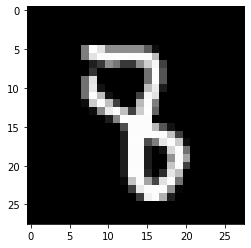

Model prediction: 3


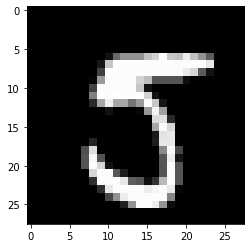

Model prediction: 5


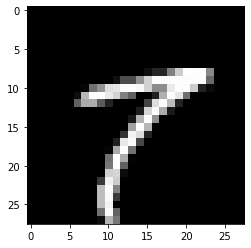

Model prediction: 7


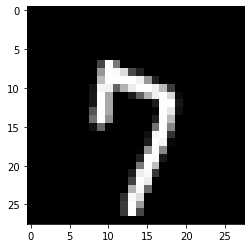

Model prediction: 7


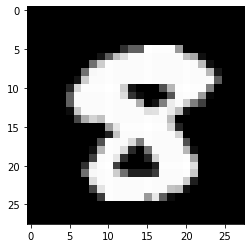

Model prediction: 8


In [28]:
# Logistic Regression

# MNIST dataset parameters
num_classes = 10
num_features = 784

# Training parameters
learning_rate = 0.01
training_steps = 2000
batch_size = 256
display_steps = 250

# load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)
x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])
x_train, x_test = x_train/255, x_test/255

# Use tf.data API to shuffle and batch data.
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)

# Weight of shape [784, 10], the 28*28 image features, and total number of classes.
W = tf.Variable(tf.ones([num_features, num_classes]), name="weight")
# Bias of shape [10], the total number of classes.
b = tf.Variable(tf.zeros([num_classes]), name="bias")

# logistic regression (Wx + b)
def logistic_regression(x):
    # Apply softmax to normalize the logits to a probability distribution.
    # ****************
    # softmax is a generalization of sigmoid function
    # sigmoid function is specifiically for binary classification
    # ****************
    return tf.nn.softmax(tf.matmul(x, W) + b)

# Cross-Entropy loss function.
def cross_entropy(y_pred, y_true):
    # Encode label to a one hot vector.
    y_true = tf.one_hot(y_true, depth=num_classes)
    # Clip prediction values to avoid log(0) error.
    y_pred = tf.clip_by_value(y_pred, 1e-9, 1.)
    # Compute cross-entropy.
    return tf.reduce_mean(-tf.reduce_sum(y_true * tf.math.log(y_pred),1))

# Accuracy metric.
def accuracy(y_pred, y_true):
    # Predicted class is the index of highest score in prediction vector (i.e. argmax).
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Stochastic gradient descent optimizer.
optimizer = tf.optimizers.SGD(learning_rate)

def run_optimization_LogReg(x, y):
    with tf.GradientTape() as g:
        pred = logistic_regression(x)
        loss = cross_entropy(pred, y)
        
    gradients = g.gradient(loss, [W, b])
    
    optimizer.apply_gradients(zip(gradients, [W, b]))

for step, (batch_x, batch_y) in enumerate (train_data.take(training_steps), 1):
    run_optimization_LogReg(batch_x, batch_y)
    
    if step % display_steps == 0:
        pred = logistic_regression(batch_x)
        loss = cross_entropy(pred, batch_y)
        acc = accuracy(pred, batch_y)
        print("step: %i, loss: %f, accuracy: %f" % (step, loss, acc))
        
# Test model on validation set.
pred = logistic_regression(x_test)
print("Test Accuracy: %f" % accuracy(pred, y_test))

# Predict 5 images from validation set.
n_images = 5
test_images = random.choices(x_test, k = n_images)
predictions = logistic_regression(test_images)

# Display image and model prediction.
for i in range(n_images):
    plt.imshow(np.reshape(test_images[i], [28, 28]), cmap='gray')
    plt.show()
    print("Model prediction: %i" % np.argmax(predictions.numpy()[i]))